In [10]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
 

In [38]:
file = r'Print 1958.xls'
df = pd.read_excel(file, sheetname='Chittorgarh',header = None)

In [39]:
type(df[2][50])

str

In [72]:
def getAreaDataFrame(df):
    data_size = len(df) // 50
    t = []
    for i in range(data_size + 1):
        lat = df[7][50*i+1]
        long = df[11][50*i+1]
        
        if pd.isnull(df[7][50*i+1]) == False:
            lat = lat.replace('N','').replace("'"," ").replace('"',' ')
            new = lat.split()
            lat = float(new[0])/10.0 + float(new[1])/60.0
            
        if pd.isnull(df[11][50*i+1]) == False:
            long = long.replace('E','').replace("'"," ").replace('"',' ')
            new = long.split()
            long = float(new[0])/10.0 + float(new[1])/60.0
            
        t += [[df[2][50*i], df[7][50*i],df[11][50*i],df[2][50*i+1],lat,long]]
    result = pd.DataFrame(t)
    result.columns = ['STATION','DISTRICT','STATE','CATCHMENT NO:','LATITUDE','LONGITUDE']
    return result

In [73]:
AreaData = getAreaDataFrame(df)
AreaData

,STATION,DISTRICT,STATE,CATCHMENT NO:,LATITUDE,LONGITUDE
0,UDAIPUR (A),UDAIPUR,RAJASTHAN,NaN,24.583333,73.700000
1,KOTRA CANTT (A),UDAIPUR,RAJASTHAN,105.0,24.183333,73.916667
2,JHADOL (A),UDAIPUR,RAJASTHAN,106.0,25.750000,74.083333
3,TARPAL (A),UDAIPUR,RAJASTHAN,105.0,23.983333,73.600000
4,UDAIPUR (GIRAVA),UDAIPUR,RAJASTHAN,106.0,24.066667,73.883333
5,GOGUNDA,UDAIPUR,RAJASTHAN,106.0,24.400000,73.466667
6,NATHDWARA,UDAIPUR,RAJASTHAN,106.0,24.583333,73.700000
7,RAILMAGRA,UDAIPUR,RAJASTHAN,106.0,25.166667,73.566667
8,KUMBHALGARH,UDAIPUR,RAJASTHAN,106.0,25.316667,73.933333
9,AMET,UDAIPUR,RAJASTHAN,106.0,25.316667,73.933333


In [74]:
def getMonthlyDataFrame(df):
    data_size = len(df) // 50
    z = df.iloc[[50*0 + 38]]
    for i in range(1,data_size+1):
        z1 = df.iloc[[50*i + 38]]
        z = pd.concat([z,z1],ignore_index = True)
        z = z.drop(0,axis = 1)
    months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
    z.columns = months
    z[months] = z[months].apply(pd.to_numeric, errors='coerce', axis=1)
    return z

In [75]:
Monthly_Rainfall = getMonthlyDataFrame(df)
Monthly_Rainfall

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,3.8,0.0,1.0,3.5,9.0,102.8,129.6,257.6,9.9,0.0,0.0,2.0
1,6.7,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,68.0,168.0,18.4,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,5.0,76.9,276.0,362.0,12.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,8.6,98.6,132.9,267.6,3.6,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,28.6,97.9,132.6,5.6,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,94.2,26.5,219.5,12.2,0.0,0.0,0.0
7,0.0,0.0,42.2,9.1,0.0,88.1,85.7,223.5,4.1,0.0,0.0,0.0
8,0.0,0.0,4.1,0.0,0.0,199.8,136.3,246.1,19.0,0.0,0.0,0.0
9,0.0,0.0,44.5,0.0,23.1,144.9,124.5,311.2,11.4,0.0,0.0,0.0


In [76]:
Monthly_Rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
JAN    28 non-null float64
FEB    28 non-null float64
MAR    28 non-null float64
APR    28 non-null float64
MAY    28 non-null float64
JUN    28 non-null float64
JUL    27 non-null float64
AUG    27 non-null float64
SEP    27 non-null float64
OCT    28 non-null float64
NOV    28 non-null float64
DEC    28 non-null float64
dtypes: float64(12)
memory usage: 2.7 KB


In [77]:
def getAnnualDataFrame(df): 
    data_size = len(df) // 50
    annual_rain = df.iloc[[50*0 + 47]]
    for i in range(1,data_size+1):
        annual_rain_unit = df.iloc[[50*i + 47]]
        annual_rain = pd.concat([annual_rain,annual_rain_unit],ignore_index = True)
    annual_rain = annual_rain.dropna(axis='columns')
    annual_rain = annual_rain.drop([0,4,8,12],axis = 1)
    annual_rain.columns = ['ANNUAL RAINFALL','ANNUAL RAINY DAYS']
    annual_rain[annual_rain.columns] = annual_rain[annual_rain.columns].apply(pd.to_numeric, errors='coerce', axis=1)
    return annual_rain

In [78]:
Annual_Rainfall = getAnnualDataFrame(df)
Annual_Rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
ANNUAL RAINFALL      28 non-null float64
ANNUAL RAINY DAYS    28 non-null float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [79]:
def getSummaryRainfallDataFrame(df):
    Annual_Rainfall = getAnnualDataFrame(df)
    Monthly_Rainfall = getMonthlyDataFrame(df)
    AreaData = getAreaDataFrame(df)
    Rainfall = pd.concat([AreaData,Monthly_Rainfall,Annual_Rainfall],axis = 1)
    return Rainfall

In [80]:
Rainfall = getSummaryRainfallDataFrame(df)
Rainfall

,STATION,DISTRICT,STATE,CATCHMENT NO:,LATITUDE,LONGITUDE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,ANNUAL RAINY DAYS
0,UDAIPUR (A),UDAIPUR,RAJASTHAN,NaN,24.583333,73.700000,3.8,0.0,1.0,3.5,9.0,102.8,129.6,257.6,9.9,0.0,0.0,2.0,519.2,28.0
1,KOTRA CANTT (A),UDAIPUR,RAJASTHAN,105.0,24.183333,73.916667,6.7,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,6.7,1.0
2,JHADOL (A),UDAIPUR,RAJASTHAN,106.0,25.750000,74.083333,0.0,0.0,0.0,0.0,0.0,68.0,168.0,18.4,0.0,0.0,0.0,0.0,254.4,13.0
3,TARPAL (A),UDAIPUR,RAJASTHAN,105.0,23.983333,73.600000,0.0,0.0,0.0,0.0,5.0,76.9,276.0,362.0,12.0,0.0,0.0,0.0,731.9,38.0
4,UDAIPUR (GIRAVA),UDAIPUR,RAJASTHAN,106.0,24.066667,73.883333,0.0,0.0,0.0,0.0,8.6,98.6,132.9,267.6,3.6,0.0,0.0,0.0,511.3,26.0
5,GOGUNDA,UDAIPUR,RAJASTHAN,106.0,24.400000,73.466667,0.0,0.0,0.0,0.0,0.0,28.6,97.9,132.6,5.6,0.0,0.0,0.0,264.7,22.0
6,NATHDWARA,UDAIPUR,RAJASTHAN,106.0,24.583333,73.700000,0.0,0.0,0.0,0.0,0.0,94.2,26.5,219.5,12.2,0.0,0.0,0.0,352.4,20.0
7,RAILMAGRA,UDAIPUR,RAJASTHAN,106.0,25.166667,73.566667,0.0,0.0,42.2,9.1,0.0,88.1,85.7,223.5,4.1,0.0,0.0,0.0,452.7,24.0
8,KUMBHALGARH,UDAIPUR,RAJASTHAN,106.0,25.316667,73.933333,0.0,0.0,4.1,0.0,0.0,199.8,136.3,246.1,19.0,0.0,0.0,0.0,605.3,33.0
9,AMET,UDAIPUR,RAJASTHAN,106.0,25.316667,73.933333,0.0,0.0,44.5,0.0,23.1,144.9,124.5,311.2,11.4,0.0,0.0,0.0,659.6,24.0


In [81]:
df1 = pd.read_excel(file, sheetname='Udaipur',header = None)

In [82]:
Rainfall2 = getSummaryRainfallDataFrame(df1)

In [83]:
Rainfall2

,STATION,DISTRICT,STATE,CATCHMENT NO:,LATITUDE,LONGITUDE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,ANNUAL RAINY DAYS
0,UDAIPUR (A),UDAIPUR,RAJASTHAN,NaN,24.583333,73.700000,3.8,0.0,1.0,3.5,9.0,102.8,129.6,257.6,9.9,0.0,0.0,2.0,519.2,28.0
1,KOTRA CANTT (A),UDAIPUR,RAJASTHAN,105.0,24.183333,73.916667,6.7,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,6.7,1.0
2,JHADOL (A),UDAIPUR,RAJASTHAN,106.0,25.750000,74.083333,0.0,0.0,0.0,0.0,0.0,68.0,168.0,18.4,0.0,0.0,0.0,0.0,254.4,13.0
3,TARPAL (A),UDAIPUR,RAJASTHAN,105.0,23.983333,73.600000,0.0,0.0,0.0,0.0,5.0,76.9,276.0,362.0,12.0,0.0,0.0,0.0,731.9,38.0
4,UDAIPUR (GIRAVA),UDAIPUR,RAJASTHAN,106.0,24.066667,73.883333,0.0,0.0,0.0,0.0,8.6,98.6,132.9,267.6,3.6,0.0,0.0,0.0,511.3,26.0
5,GOGUNDA,UDAIPUR,RAJASTHAN,106.0,24.400000,73.466667,0.0,0.0,0.0,0.0,0.0,28.6,97.9,132.6,5.6,0.0,0.0,0.0,264.7,22.0
6,NATHDWARA,UDAIPUR,RAJASTHAN,106.0,24.583333,73.700000,0.0,0.0,0.0,0.0,0.0,94.2,26.5,219.5,12.2,0.0,0.0,0.0,352.4,20.0
7,RAILMAGRA,UDAIPUR,RAJASTHAN,106.0,25.166667,73.566667,0.0,0.0,42.2,9.1,0.0,88.1,85.7,223.5,4.1,0.0,0.0,0.0,452.7,24.0
8,KUMBHALGARH,UDAIPUR,RAJASTHAN,106.0,25.316667,73.933333,0.0,0.0,4.1,0.0,0.0,199.8,136.3,246.1,19.0,0.0,0.0,0.0,605.3,33.0
9,AMET,UDAIPUR,RAJASTHAN,106.0,25.316667,73.933333,0.0,0.0,44.5,0.0,23.1,144.9,124.5,311.2,11.4,0.0,0.0,0.0,659.6,24.0


In [84]:
Rainfall = pd.concat([Rainfall, Rainfall2],ignore_index = True)
Rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 20 columns):
STATION              56 non-null object
DISTRICT             56 non-null object
STATE                56 non-null object
CATCHMENT NO:        34 non-null float64
LATITUDE             50 non-null float64
LONGITUDE            50 non-null float64
JAN                  56 non-null float64
FEB                  56 non-null float64
MAR                  56 non-null float64
APR                  56 non-null float64
MAY                  56 non-null float64
JUN                  56 non-null float64
JUL                  54 non-null float64
AUG                  54 non-null float64
SEP                  54 non-null float64
OCT                  56 non-null float64
NOV                  56 non-null float64
DEC                  56 non-null float64
ANNUAL RAINFALL      56 non-null float64
ANNUAL RAINY DAYS    56 non-null float64
dtypes: float64(17), object(3)
memory usage: 8.8+ KB


In [85]:
sheetnames = ['Ajmer','Alwar','Banswara','Barmer','Bharatpur','Bhilwara','Bikaner','Bundi','Chittorgarh','Churu','Dungarpur','Ganganagar','Jaipur','Jaisalmer','Jalore','Jhalawar','Jhunjhunu','Jodhpur','Kota','Nagaur','Pali','Sawai Madhopur','Sikar','Sirohi','Tonk','Udaipur']

In [ ]:
x = '1968'

In [88]:
file = r'Print ' + x + '.xls'
df = pd.read_excel(file, sheetname=sheetnames[0],header = None)
Rainfall = getSummaryRainfallDataFrame(df)
for sheetname in sheetnames[1:]:
    df = pd.read_excel(file, sheetname=sheetname,header = None)
    Rainfall2 = getSummaryRainfallDataFrame(df)
    Rainfall = pd.concat([Rainfall, Rainfall2],ignore_index = True)

In [89]:
Rainfall

,STATION,DISTRICT,STATE,CATCHMENT NO:,LATITUDE,LONGITUDE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,ANNUAL RAINY DAYS
0,AJMER(A),AJMER,RAJASTHAN,108.0,26.450000,74.616667,0.4,0.0,10.1,0.0,0.0,104.8,86.3,150.1,6.4,0.0,0.0,2.6,360.7,22.0
1,AJMER,AJMER,RAJASTHAN,108.0,26.450000,74.616667,0.0,0.0,9.7,0.0,0.0,105.5,83.4,147.8,6.4,0.0,0.0,0.0,352.8,22.0
2,SAWAR,AJMER,RAJASTHAN,406.0,26.066667,75.016667,0.0,0.0,0.0,0.0,0.0,0.0,NaN,162.5,7.6,0.0,0.0,0.0,170.1,9.0
3,KEKRI,AJMER,RAJASTHAN,406.0,25.966667,75.150000,0.0,0.0,0.0,0.0,0.0,21.6,92.0,166.4,7.4,0.0,0.0,0.0,287.4,19.0
4,PISANGAN,AJMER,RAJASTHAN,406.0,25.966667,75.150000,0.0,0.0,0.0,0.0,0.0,48.0,49.3,124.0,0.0,0.0,0.0,0.0,221.3,10.0
5,GOELA,AJMER,RAJASTHAN,406.0,26.116667,74.950000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
6,BEAWAR,AJMER,RAJASTHAN,NaN,26.100000,74.316667,0.0,0.0,17.4,0.0,0.0,104.1,108.1,148.3,7.9,0.0,0.0,0.0,385.8,19.0
7,JAWAJA,AJMER,RAJASTHAN,108.0,25.950000,74.216667,0.0,0.0,0.0,0.0,0.0,52.3,38.1,83.7,0.0,0.0,0.0,0.0,174.1,9.0
8,TATGARH,AJMER,RAJASTHAN,108.0,25.683333,73.966667,0.0,0.0,0.0,0.0,0.0,0.0,105.4,73.3,0.0,0.0,0.0,0.0,178.7,9.0
9,NASIRABAD,AJMER,RAJASTHAN,406.0,26.283333,74.733333,1.5,0.0,0.0,0.0,0.0,0.0,45.9,126.2,42.9,0.0,0.0,0.0,216.5,15.0


In [90]:
export_csv = Rainfall.to_csv (r'Rainfall_' + x + '.csv', index = None, header=True)

In [91]:
Rainfall.describe()

,CATCHMENT NO:,LATITUDE,LONGITUDE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,ANNUAL RAINY DAYS
count,347.000000,345.000000,345.000000,376.000000,376.0,376.000000,376.000000,376.000000,373.000000,366.000000,371.000000,372.000000,374.000000,376.000000,376.000000,376.000000,376.000000
mean,312.726225,26.229034,74.797488,1.488830,0.0,6.785904,0.190160,2.791489,50.699464,141.947568,245.346631,14.920430,6.592781,0.035106,2.678989,465.841250,22.622340
std,166.880326,1.662904,1.524132,4.284513,0.0,14.200777,1.043754,7.796969,49.504092,89.983845,177.879971,18.370196,17.172947,0.680738,5.458181,256.124893,10.309138
min,105.000000,23.200000,70.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108.000000,24.933333,73.750000,0.000000,0.0,0.000000,0.000000,0.000000,11.400000,80.300000,101.050000,0.000000,0.000000,0.000000,0.000000,259.125000,15.000000
50%,403.000000,26.100000,74.616667,0.000000,0.0,0.000000,0.000000,0.000000,37.600000,125.950000,208.900000,7.900000,0.000000,0.000000,0.000000,438.250000,22.000000
75%,406.000000,27.316667,76.083333,0.000000,0.0,8.900000,0.000000,0.000000,76.200000,181.325000,366.800000,22.950000,0.000000,0.000000,2.525000,646.875000,30.000000
max,600.000000,30.133333,78.183333,38.100000,0.0,164.400000,11.400000,62.700000,244.800000,630.000000,902.800000,105.400000,118.500000,13.200000,27.900000,1402.200000,52.000000


In [92]:
Rainfall = Rainfall.sort_values(by = 'ANNUAL RAINFALL',ascending = False)
Rainfall

,STATION,DISTRICT,STATE,CATCHMENT NO:,LATITUDE,LONGITUDE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,ANNUAL RAINY DAYS
334,MOUNT ABU,SIROHI,RAJASTHAN,107.0,24.633333,72.533333,0.5,0.0,1.8,0.0,0.0,114.0,586.2,667.8,25.6,0.0,0.0,6.3,1402.2,52.0
328,MOUNT ABU (a),SIROHI,RAJASTHAN,107.0,24.600000,72.716667,0.3,0.0,2.4,0.0,0.0,98.0,630.0,587.8,54.4,0.0,0.0,8.6,1381.5,48.0
201,BASWA,JAIPUR,RAJASTHAN,406.0,27.150000,76.583333,0.0,0.0,37.1,0.0,0.0,39.9,206.5,902.8,0.0,20.8,0.0,0.0,1207.1,34.0
260,KISHANGANJ,KOTA,RAJASTHAN,405.0,24.616667,76.783333,0.0,0.0,0.0,0.0,0.0,87.8,206.3,772.5,3.8,6.6,0.0,0.0,1077.0,39.0
70,NADBAI,BHARATPUR,RAJASTHAN,403.0,27.216667,77.183333,0.0,0.0,31.7,0.0,29.2,39.4,203.7,700.7,25.1,19.6,0.0,0.0,1049.4,38.0
259,SHAHBAD,KOTA,RAJASTHAN,405.0,25.100000,76.650000,0.0,0.0,20.3,0.0,16.5,108.4,174.1,681.2,14.0,15.2,0.0,0.0,1029.7,45.0
265,CHHABRA,KOTA,RAJASTHAN,405.0,24.633333,75.933333,3.1,0.0,30.5,0.0,10.2,103.9,145.6,649.6,59.7,10.2,0.0,0.0,1012.8,46.0
256,BARAN,KOTA,RAJASTHAN,405.0,25.116667,76.516667,5.6,0.0,16.8,0.0,0.0,72.0,257.0,617.4,17.8,22.1,0.0,0.0,1008.7,42.0
225,BAKANI,JHALAWAR,RAJASTHAN,405.0,24.300000,76.233333,9.2,0.0,7.7,0.0,0.0,181.3,156.8,587.1,57.9,0.0,0.0,5.6,1005.6,40.0
227,MANOHARTHANA,JHALAWAR,RAJASTHAN,405.0,24.733333,76.383333,7.7,0.0,4.8,0.0,0.0,114.8,242.0,594.4,22.9,13.2,0.0,0.8,1000.6,44.0


In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

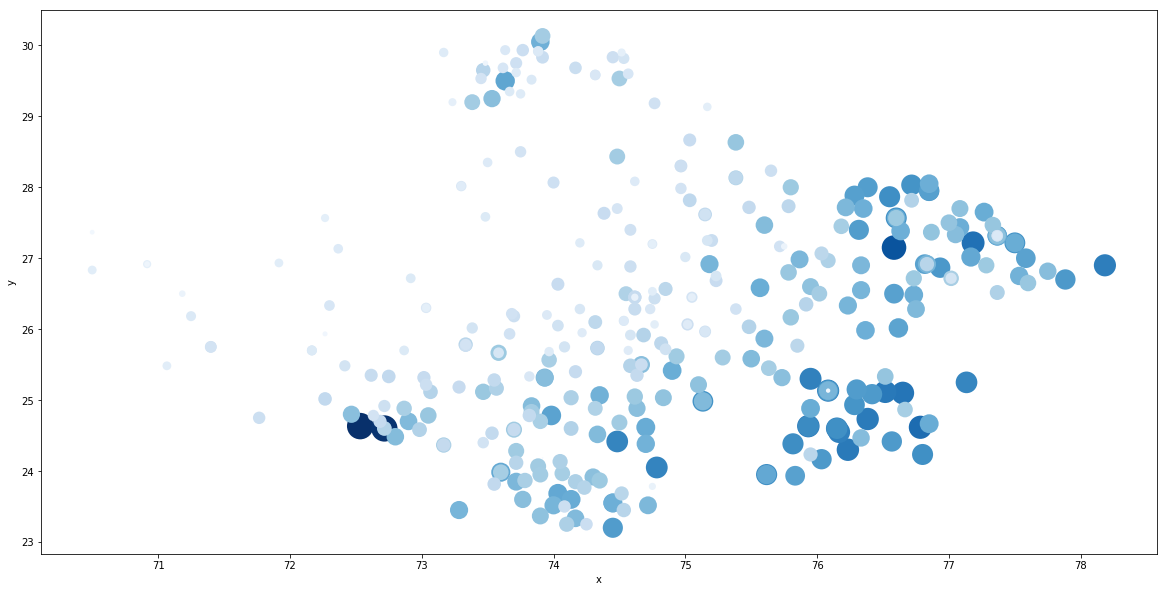

In [96]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax.scatter(Rainfall['LONGITUDE'],Rainfall['LATITUDE'],s= Rainfall['ANNUAL RAINFALL']/2,c=Rainfall['ANNUAL RAINFALL'], cmap='Blues', edgecolor='none');
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.savefig('Images/' + x +'Rainfall.png', format='png', dpi=300)

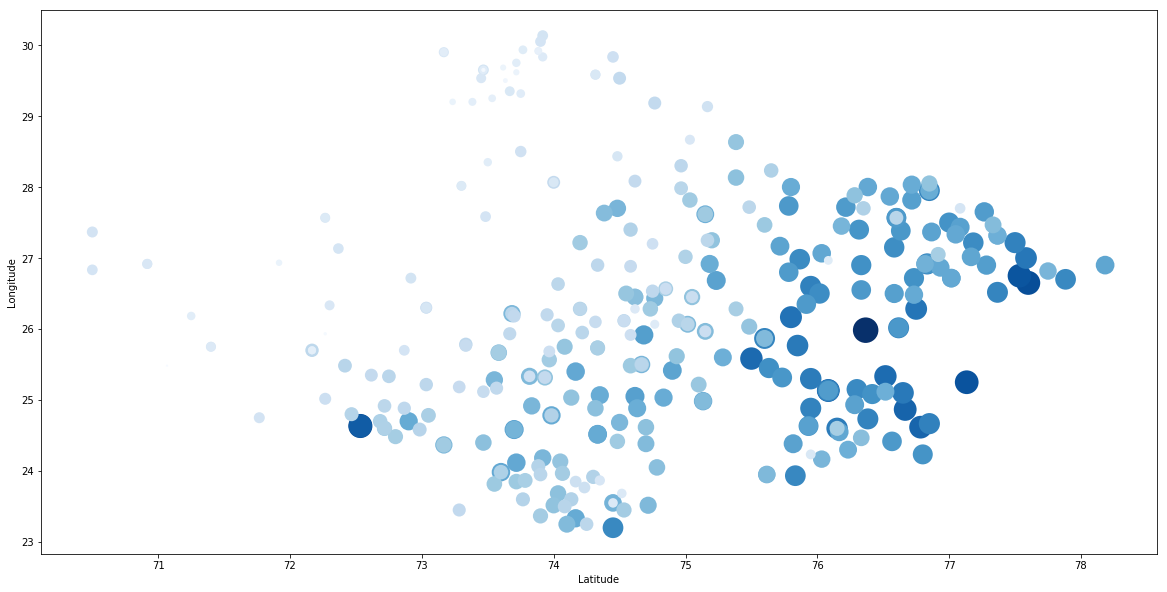

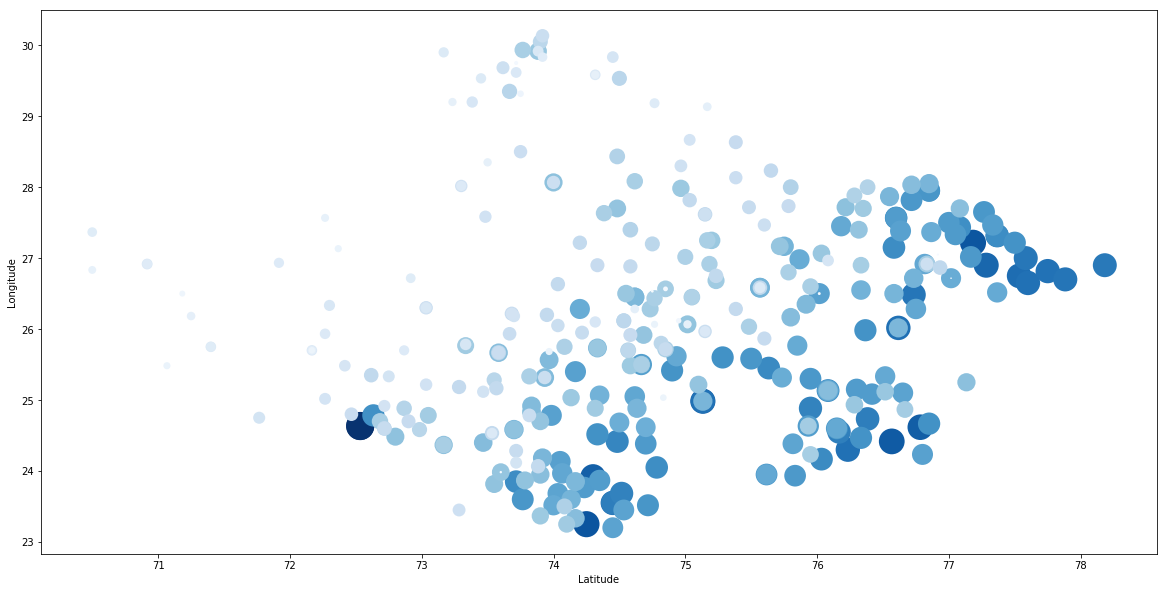

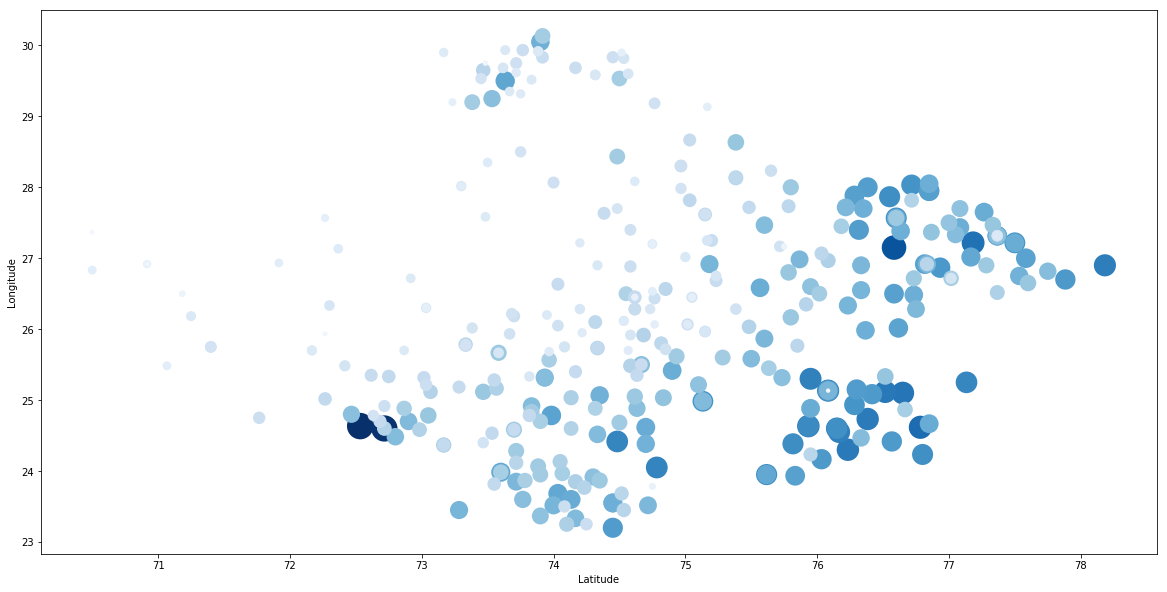

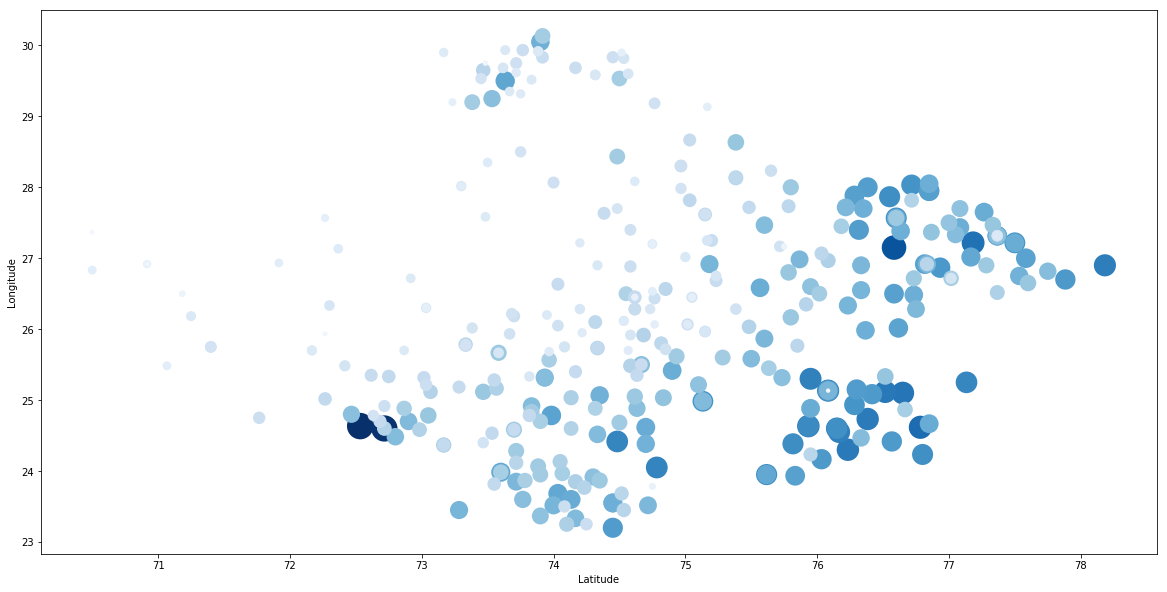

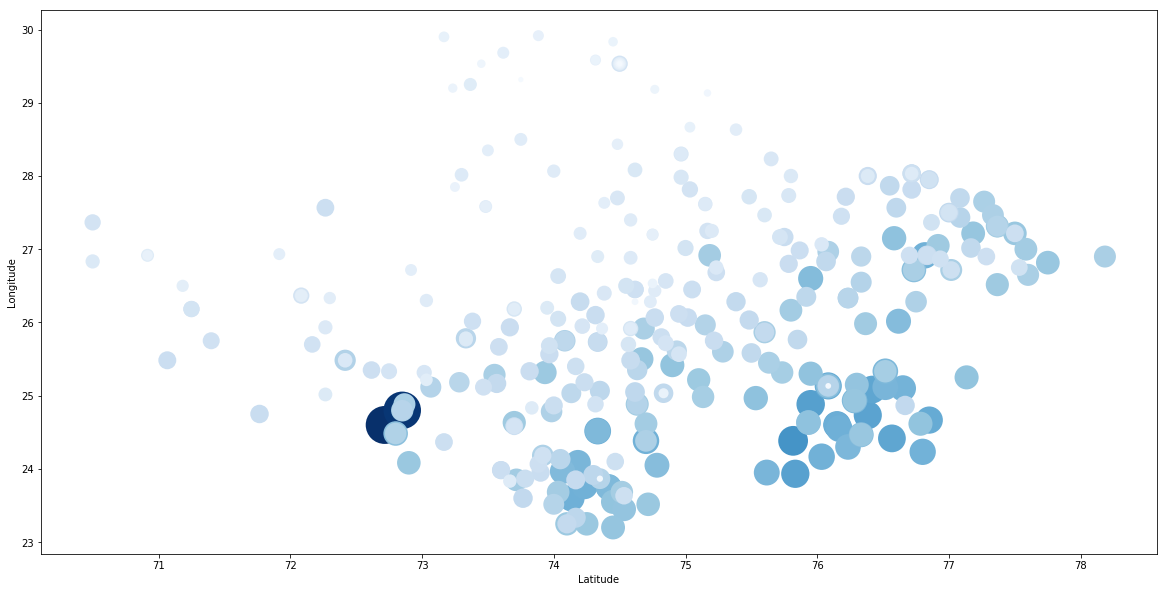

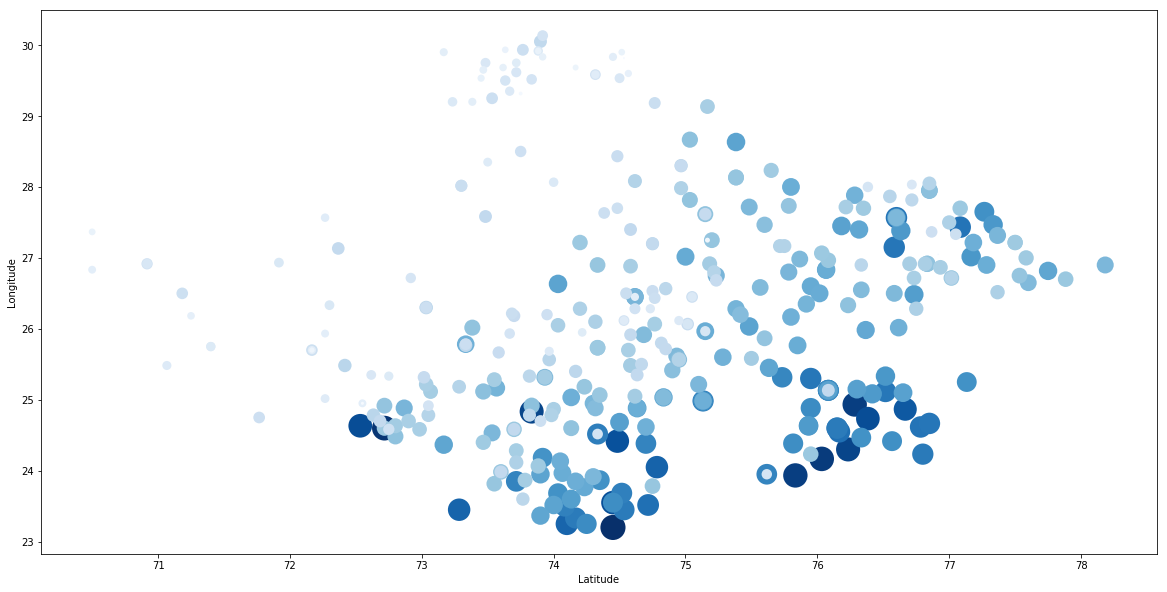

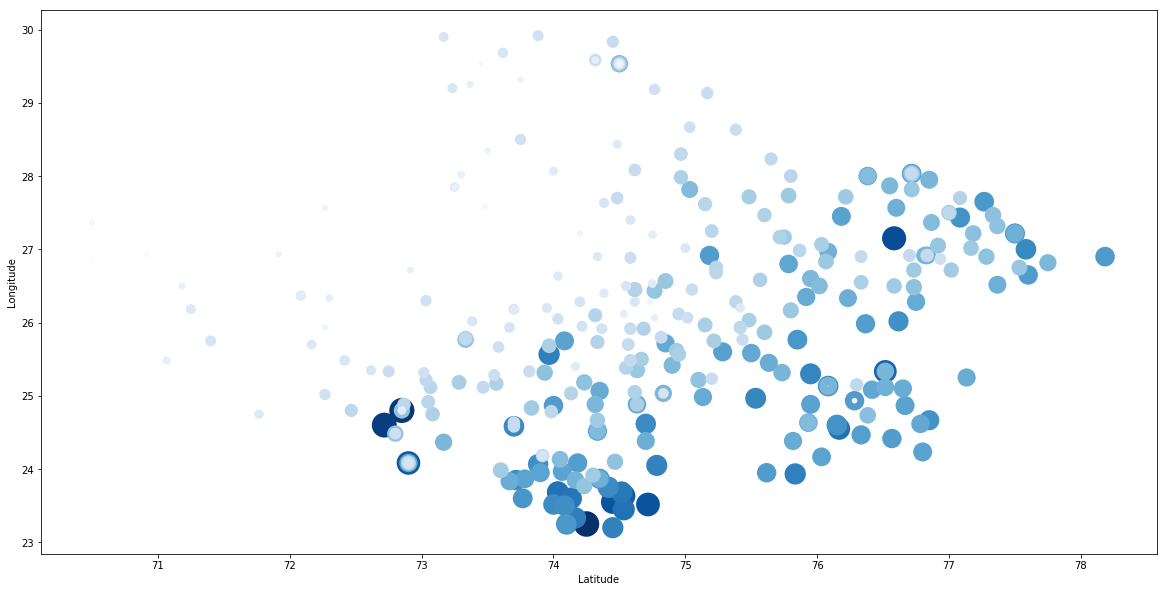

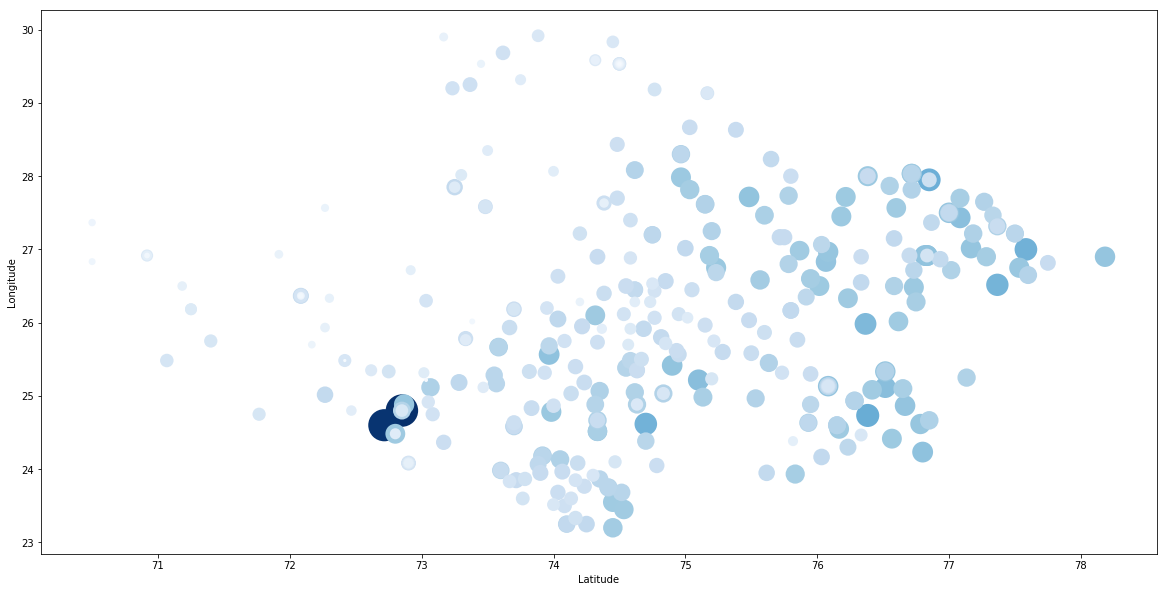

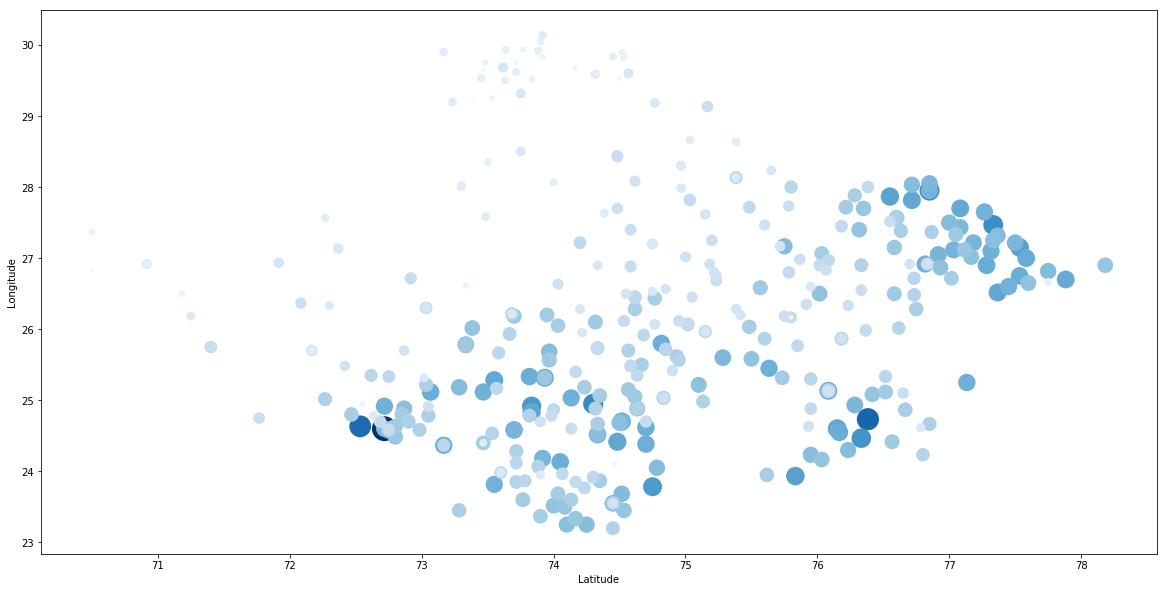

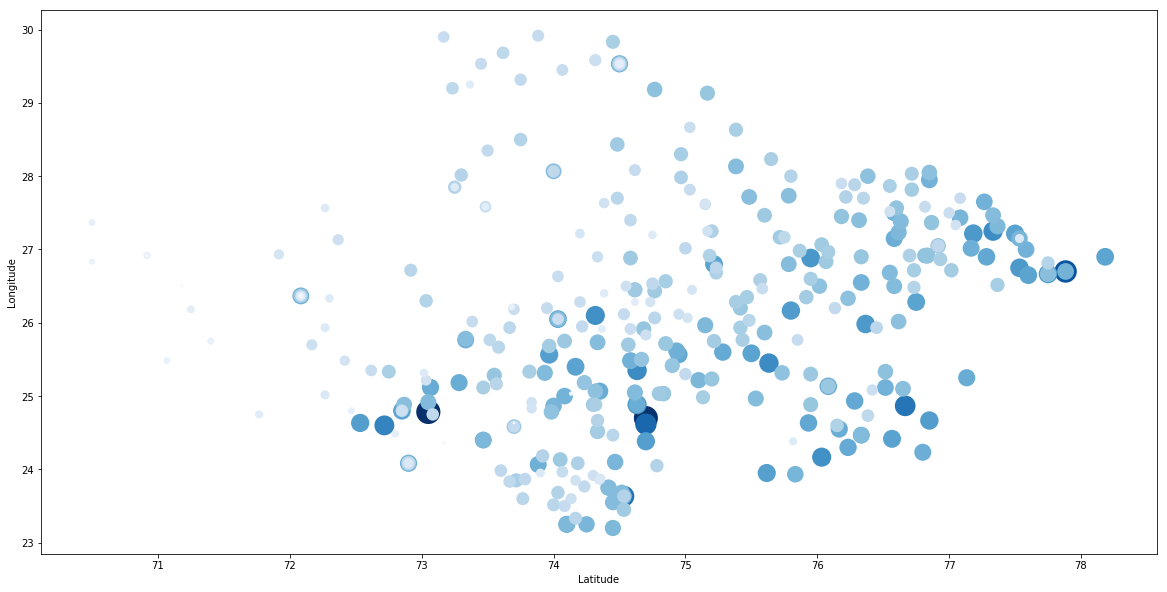

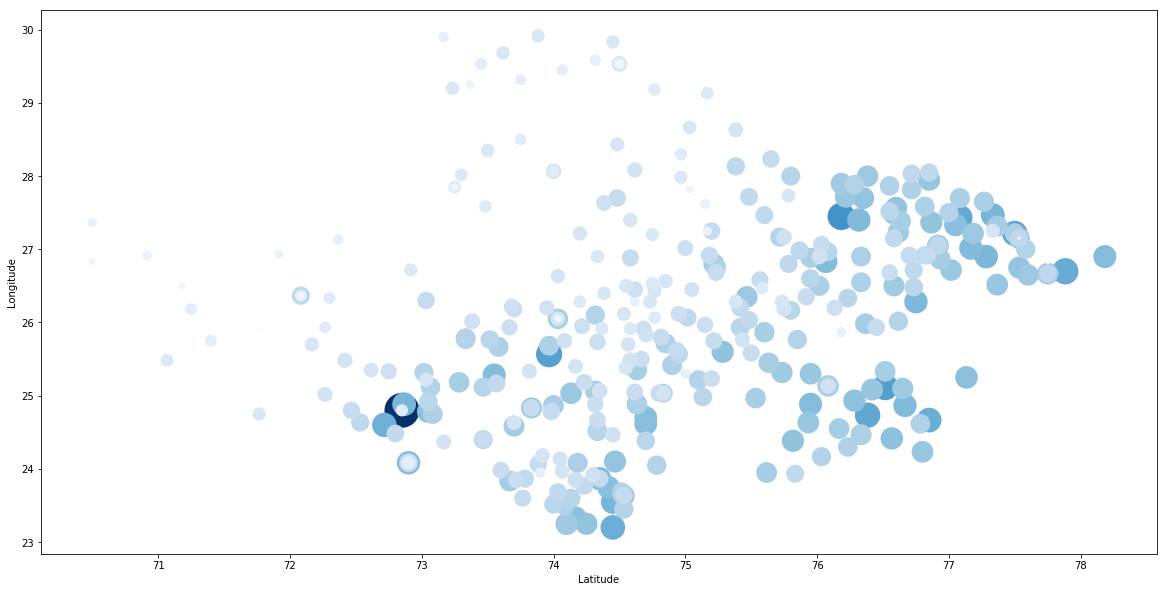

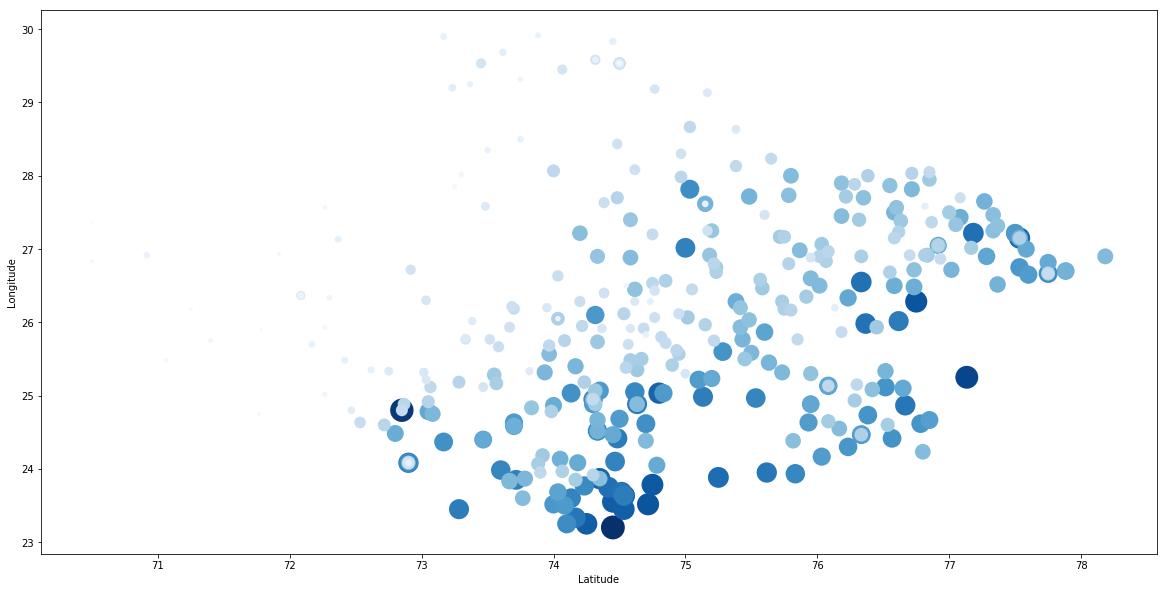

In [99]:
years = ['1957','1958','1959','1960','1961','1962','1963','1964','1965','1966','1967','1968']
     
for x in years:         
    file = r'Print ' + x + '.xls'
    df = pd.read_excel(file, sheetname=sheetnames[0],header = None)
    Rainfall = getSummaryRainfallDataFrame(df)
    for sheetname in sheetnames[1:]:
        df = pd.read_excel(file, sheetname=sheetname,header = None)
        Rainfall2 = getSummaryRainfallDataFrame(df)
        Rainfall = pd.concat([Rainfall, Rainfall2],ignore_index = True)
    Rainfall = Rainfall.sort_values(by = 'ANNUAL RAINFALL',ascending = False)
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes()
    ax.scatter(Rainfall['LONGITUDE'],Rainfall['LATITUDE'],s= Rainfall['ANNUAL RAINFALL']/2,c=Rainfall['ANNUAL RAINFALL'], cmap='Blues', edgecolor='none');
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    plt.savefig('Images/' + x +'Rainfall.png', format='png', dpi=300)